In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
keras = tf.keras

In [ ]:
def plot_series(time,series,format="-",start=0,end=None,label=None):
    plt.plot(time[start:end], series[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

    
def trend(time,slope=0):
    return slope*time
    
#seasonal Data
def seasonal_pattern(season_time):
    return np.where(season_time< 0.4,np.cos(season_time*2*np.pi),
                   1/np.exp(3*season_time))

def seasonality(time,period,amplitude=1,phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

# noise
def white_noise(time,noise_level=1,seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level


In [ ]:
time = np.arange(4*365+1)
slope = 0.05
baseline = 10
amplitude = 40

In [ ]:
series = baseline+trend(time,slope)+seasonality(time,period=365,amplitude=amplitude)
noise_level = 5
noise = white_noise(time,noise_level,seed=42)
series += noise

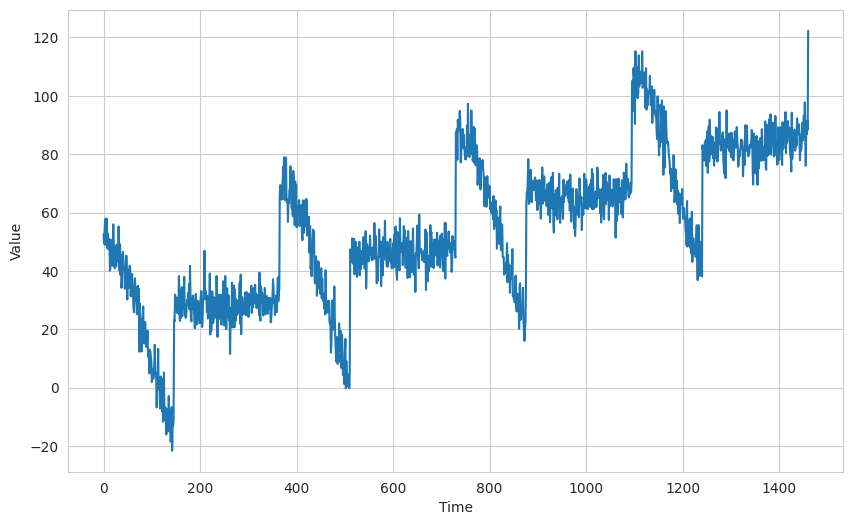

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [ ]:
def window_dataset(series,window_size,batch_size=32,shuffle_buffer=100):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1,shift=1,drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window:(window[:-1],window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [ ]:
split_time = 1000
time_train = time[:split_time]
X_train = series[:split_time]
time_valid = time[split_time:]
X_valid = series[split_time:]

In [ ]:
split_time = 1000
time_train = time[:split_time]
X_train = series[:split_time]
time_valid = time[split_time:]
X_valid = series[split_time:]

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30

In [ ]:
train_set = window_dataset(X_train,window_size)

In [ ]:
valid_set = window_dataset(X_valid,window_size)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

In [ ]:
model.fit(train_set,epochs=10,validation_data=valid_set)

Epoch 1/10
31/31 [==============================] - 2s 37ms/step - loss: 7.9316 - mae: 8.4189 - val_loss: 7.4806 - val_mae: 7.9664
Epoch 2/10
31/31 [==============================] - 0s 12ms/step - loss: 7.6003 - mae: 8.0814 - val_loss: 7.1963 - val_mae: 7.6802
Epoch 3/10
31/31 [==============================] - 1s 17ms/step - loss: 7.4238 - mae: 7.9079 - val_loss: 7.0153 - val_mae: 7.4984
Epoch 4/10
31/31 [==============================] - 1s 22ms/step - loss: 7.2372 - mae: 7.7220 - val_loss: 6.9244 - val_mae: 7.4068
Epoch 5/10
31/31 [==============================] - 0s 14ms/step - loss: 7.1131 - mae: 7.5967 - val_loss: 6.7540 - val_mae: 7.2391
Epoch 6/10
31/31 [==============================] - 0s 10ms/step - loss: 7.0266 - mae: 7.5096 - val_loss: 6.7077 - val_mae: 7.1923
Epoch 7/10
31/31 [==============================] - 0s 9ms/step - loss: 6.9562 - mae: 7.4404 - val_loss: 6.7014 - val_mae: 7.1816
Epoch 8/10
31/31 [==============================] - 0s 9ms/step - loss: 6.8734 - mae

In [ ]:
# Tunning

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30


In [ ]:
train_set = window_dataset(X_train,window_size)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])

In [ ]:
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6*10**(epoch/30))

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9)

In [ ]:
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

In [ ]:
history = model.fit(train_set,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 2s 15ms/step - loss: 56.3656 - mae: 56.8653 - lr: 1.0000e-06
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 40.7963 - mae: 41.2950 - lr: 1.0798e-06
Epoch 3/100
31/31 [==============================] - 1s 17ms/step - loss: 23.2705 - mae: 23.7691 - lr: 1.1659e-06
Epoch 4/100
31/31 [==============================] - 1s 16ms/step - loss: 10.9438 - mae: 11.4345 - lr: 1.2589e-06
Epoch 5/100
31/31 [==============================] - 0s 13ms/step - loss: 9.7914 - mae: 10.2774 - lr: 1.3594e-06
Epoch 6/100
31/31 [==============================] - 1s 16ms/step - loss: 9.7032 - mae: 10.1933 - lr: 1.4678e-06
Epoch 7/100
31/31 [==============================] - 1s 19ms/step - loss: 9.5961 - mae: 10.0852 - lr: 1.5849e-06
Epoch 8/100
31/31 [==============================] - 1s 17ms/step - loss: 9.5106 - mae: 9.9981 - lr: 1.7113e-06
Epoch 9/100
31/31 [==============================] - 1s 16ms/step - loss: 9.4103 - mae: 9.899

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30


In [ ]:
train_set = window_dataset(X_train,window_size)
valid_set = window_dataset(X_valid,window_size)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(1,input_shape=[window_size])
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

In [ ]:
early_stooping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set,epochs=500,validation_data=valid_set,callbacks=[early_stooping])

Epoch 1/500
31/31 [==============================] - 2s 31ms/step - loss: 31.5389 - mae: 32.0356 - val_loss: 19.1242 - val_mae: 19.6220
Epoch 2/500
31/31 [==============================] - 0s 9ms/step - loss: 10.6400 - mae: 11.1269 - val_loss: 9.3495 - val_mae: 9.8375
Epoch 3/500
31/31 [==============================] - 0s 12ms/step - loss: 9.6885 - mae: 10.1779 - val_loss: 9.1866 - val_mae: 9.6730
Epoch 4/500
31/31 [==============================] - 1s 23ms/step - loss: 9.2862 - mae: 9.7726 - val_loss: 8.7820 - val_mae: 9.2645
Epoch 5/500
31/31 [==============================] - 1s 24ms/step - loss: 9.0818 - mae: 9.5670 - val_loss: 8.5566 - val_mae: 9.0394
Epoch 6/500
31/31 [==============================] - 0s 12ms/step - loss: 8.8886 - mae: 9.3731 - val_loss: 8.3913 - val_mae: 8.8778
Epoch 7/500
31/31 [==============================] - 0s 12ms/step - loss: 8.7415 - mae: 9.2245 - val_loss: 8.1881 - val_mae: 8.6754
Epoch 8/500
31/31 [==============================] - 0s 10ms/step - lo

In [ ]:
def model_forcast(model,series,window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size,shift=1,drop_remainder=True)
    ds = ds.flat_map(lambda w:w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
lin_forecast = model_forcast(model,series[split_time-window_size:-1],window_size)[:,0]

15/15 [==============================] - 0s 8ms/step


In [ ]:
lin_forecast

array([ 65.289955,  65.761246,  70.87029 ,  67.954   ,  66.427   ,
        66.307144,  66.78478 ,  67.11859 ,  68.77403 ,  66.57784 ,
        66.14949 ,  67.911835,  69.118576,  69.96856 ,  67.76427 ,
        68.56817 ,  67.84046 ,  67.63092 ,  65.132225,  63.00939 ,
        66.00426 ,  64.471016,  65.04093 ,  65.55733 ,  68.22696 ,
        67.63408 ,  71.842026,  67.36445 ,  69.723   ,  65.75224 ,
        68.46616 ,  63.668854,  63.25046 ,  61.0411  ,  64.898186,
        64.051346,  68.4047  ,  61.84009 ,  65.3983  ,  63.203835,
        66.52701 ,  68.251656,  67.31771 ,  66.78938 ,  67.404076,
        67.381805,  68.66095 ,  67.53853 ,  66.18412 ,  65.86702 ,
        68.080345,  71.35918 ,  66.13995 ,  64.15521 ,  68.64688 ,
        66.33772 ,  65.82281 ,  64.79535 ,  67.06113 ,  66.05739 ,
        67.77122 ,  67.62237 ,  63.42149 ,  64.63687 ,  63.094124,
        64.42892 ,  61.593056,  61.325123,  64.22732 ,  63.313297,
        66.382935,  64.389565,  66.87787 ,  68.00231 ,  65.882

In [ ]:
lin_forecast.shape

(461,)

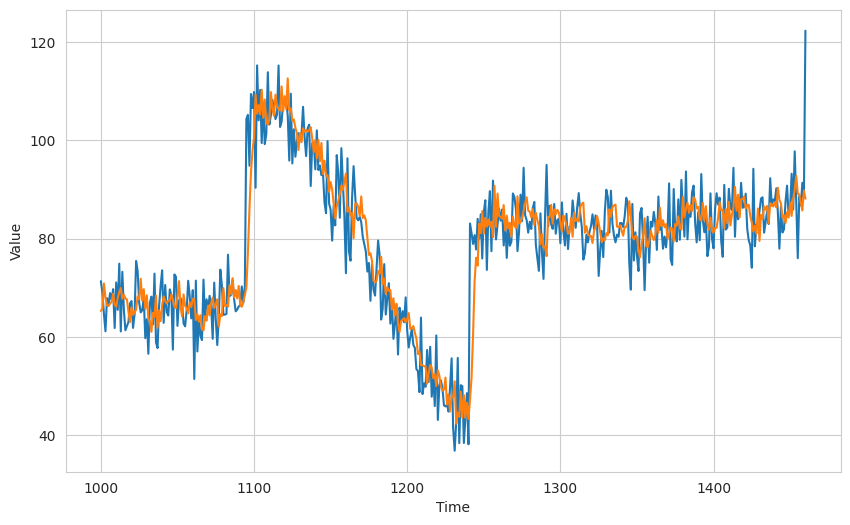

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid,X_valid)
plot_series(time_valid,lin_forecast)

In [ ]:
# Dense Model 

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30
train_set = window_dataset(X_train,window_size)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(10,activation='relu',input_shape=[window_size]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-7*10**(epoch/20))

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=1e-7,momentum=0.9)
model.compile(loss=keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])
history = model.fit(train_set,epochs=100,callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 2s 14ms/step - loss: 9.5181 - mae: 10.0080 - lr: 1.0000e-07
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 8.9084 - mae: 9.3935 - lr: 1.1220e-07
Epoch 3/100
31/31 [==============================] - 0s 7ms/step - loss: 8.3652 - mae: 8.8514 - lr: 1.2589e-07
Epoch 4/100
31/31 [==============================] - 0s 6ms/step - loss: 7.9724 - mae: 8.4562 - lr: 1.4125e-07
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 7.7357 - mae: 8.2174 - lr: 1.5849e-07
Epoch 6/100
31/31 [==============================] - 0s 6ms/step - loss: 7.6154 - mae: 8.0977 - lr: 1.7783e-07
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 7.5615 - mae: 8.0451 - lr: 1.9953e-07
Epoch 8/100
31/31 [==============================] - 0s 6ms/step - loss: 7.5360 - mae: 8.0197 - lr: 2.2387e-07
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 7.5187 - mae: 8.0045 - lr: 2.5119e-07

(1e-07, 0.005, 0.0, 30.0)

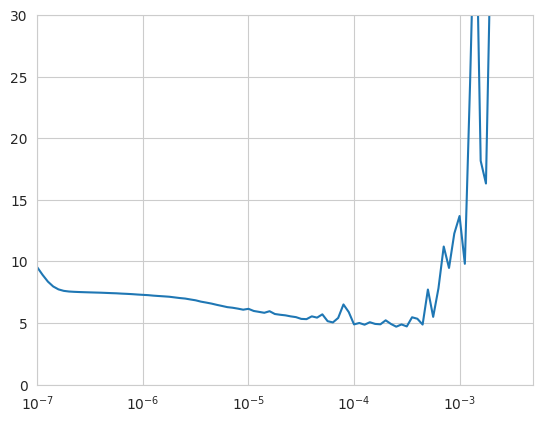

In [ ]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-7,5e-3,0,30])

In [ ]:
# tunning

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
window_size = 30
train_set = window_dataset(X_train,window_size)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(10,activation='relu',input_shape=[window_size]),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=1e-5,momentum=0.9)
model.compile(loss=keras.losses.Huber(),
             optimizer=optimizer,
             metrics=['mae'])

In [ ]:
early_stooping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set,epochs=500,
         validation_data=valid_set,
         callbacks=[early_stooping])

Epoch 1/500
31/31 [==============================] - 2s 32ms/step - loss: 22.1856 - mae: 22.6811 - val_loss: 9.9066 - val_mae: 10.3965
Epoch 2/500
31/31 [==============================] - 1s 25ms/step - loss: 8.8085 - mae: 9.2984 - val_loss: 6.7792 - val_mae: 7.2574
Epoch 3/500
31/31 [==============================] - 1s 19ms/step - loss: 7.4193 - mae: 7.8992 - val_loss: 6.8023 - val_mae: 7.2840
Epoch 4/500
31/31 [==============================] - 0s 12ms/step - loss: 7.2031 - mae: 7.6872 - val_loss: 6.9465 - val_mae: 7.4344
Epoch 5/500
31/31 [==============================] - 0s 12ms/step - loss: 7.0879 - mae: 7.5735 - val_loss: 6.7944 - val_mae: 7.2832
Epoch 6/500
31/31 [==============================] - 0s 10ms/step - loss: 7.0665 - mae: 7.5537 - val_loss: 6.7238 - val_mae: 7.2123
Epoch 7/500
31/31 [==============================] - 0s 10ms/step - loss: 6.9524 - mae: 7.4348 - val_loss: 6.5901 - val_mae: 7.0784
Epoch 8/500
31/31 [==============================] - 0s 9ms/step - loss: 

In [ ]:
dense_forcast = model_forcast(model,
                             series[split_time-window_size:-1],window_size)[:,0]

In [ ]:
plt.figure(figsize=(10,6))
plot_series(time_valid,X_valid)
plot_series(time_valid,dense_forcast)

In [ ]:

keras.metrics.mean_absolute_error(X_valid,dense_forcast).numpy()